# Numerical Python 
from Scratch and then with Numpy

In [133]:
from functools import partial, reduce
from numpy.linalg import inv, qr

In [105]:
grades_1 = [95, 80, 75]
grades_2 = [30, 20, 50]

def vector_add(v, w):
    return [v_i + w_i for v_i, w_i in zip(v, w)]


def vector_substract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v, w)]


    #sum a list of vectors
def vector_sum(vectors):
    return reduce(vector_add, vectors)

    #or
vector_sum = partial(reduce, vector_add)

In [106]:
import math

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]


def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))


def sum_of_squares(v):
    return dot(v, v)


def magnitude(v):
    return math.sqrt(sum_of_squares(v))

        #[(v_1 - w_1)**2 + ... + (v_n - w_n)**2]**(1/2)
def distance(v, w):
        return magnitude(vector_substract(v, w))

### Matrices

In [107]:
A = [[1, 2, 3], [4, 5, 6]]    # A has 2 rows and 3 columns
B = [[1, 2], [3, 4], [5, 6]]  # B has 3 rows and 2 columns


def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]


In [109]:
def make_matrix(num_rows, num_cols, entry_fn):
    return [[entry_fn(i, j)
            for j in range(num_cols)] for i in range(num_rows)]


def is_diagonal(i, j):
    return 1 if i == j else 0

print (make_matrix(5, 5, is_diagonal))

[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]


In [110]:
    # user 0 1 2 3 4 5 6
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5)]

friends_of_five = [i 
                   for i, is_friend in enumerate(friendships[5])
                   if is_friend]

friends_of_five

[0, 1]

# Numpy

In [134]:
import numpy as np

### ndarrays

In [4]:
data1= [6, 7.5, 8, 0, 1]
data1*2

[6, 7.5, 8, 0, 1, 6, 7.5, 8, 0, 1]

In [6]:
arr1 = np.array(data1)
arr1*2

array([ 12.,  15.,  16.,   0.,   2.])

In [7]:
# Nested sequences will be converted into a multidimensional array
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [12]:
arr2= np.array(data2)
arr2, arr2.ndim, arr2.shape

(array([[1, 2, 3, 4],
        [5, 6, 7, 8]]), 2, (2, 4))

#### Creating new arrays
zeros, ones, empty, arange

In [13]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [14]:
np.zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [16]:
np.empty((2,3,1))

array([[[ 0.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.]]])

In [17]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### cast arrays
astype

In [19]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [21]:
float_arr =  arr.astype(np.float64)
float_arr

array([ 1.,  2.,  3.,  4.,  5.])

In [24]:
numeric_strings = np.array(['1.23', '32.', '2.32'], dtype=np.string_)
numeric_strings.astype(float)

array([  1.23,  32.  ,   2.32])

In [28]:
#we can also use another's dtype attribute
float_arr.astype(arr.dtype)

array([1, 2, 3, 4, 5])

### Operations between arrays

In [31]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [34]:
arr*arr + arr

array([[  2.,   6.,  12.],
       [ 20.,  30.,  42.]])

In [33]:
1/arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

### Basic Indexing and Slicing

In [35]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
arr[5], arr[5:8]

(5, array([5, 6, 7]))

In [38]:
arr[5:8]= 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [40]:
# The data is not copied, and any modifications to the view will be 
# reflected in the source array

arr_slice = arr[5:8]
arr_slice[1] = 12345 

In [41]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

In [44]:
arr_slice[:] = 64

In [45]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

 If you want a copy of a slice of an ndarray :  
 
     arr[5:8].copy()

#### higher dimensional arrays

In [49]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [50]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [51]:
arr3d[1, 0]

array([7, 8, 9])

#### Indexing with slices

In [52]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [63]:
arr3d[:,1]

array([[ 4,  5,  6],
       [10, 11, 12]])

In [64]:
arr3d[:, 1] = 0

In [65]:
arr3d

array([[[1, 2, 3],
        [0, 0, 0]],

       [[7, 8, 9],
        [0, 0, 0]]])

### Boolean Indexing

In [67]:
names = np.array(['Bob', 'Jose', 'Will', 'Jose', 'Jose', 'Bob', 'Will'])

In [84]:
data = np.random.randn(7, 4)
data

array([[-0.91776589,  1.81318656, -0.69701235,  0.4609818 ],
       [ 1.17533039,  0.65752213, -0.42729355, -0.30506766],
       [ 0.54956114, -0.10768298,  1.3608634 ,  0.55986477],
       [ 2.37112426,  0.10273777, -0.2538347 ,  0.33108211],
       [ 1.40843937, -2.02787102,  1.03815263,  1.68914553],
       [ 0.54469567,  0.75296059, -0.78659548, -1.22232052],
       [-1.7454679 ,  1.01084493,  0.42538005, -0.37146686]])

In [85]:
names == 'Bob'

array([ True, False, False, False, False,  True, False], dtype=bool)

In [86]:
# Selecting data from an array by boolean indexing always creates a copy of the data

data[names == 'Bob', 2:]

array([[-0.69701235,  0.4609818 ],
       [-0.78659548, -1.22232052]])

In [87]:
# Boolean arithmetic operands &(and), |(or)
# The keywords and, or do not work

mask = (names == 'Bob') | (names == 'Will')
data[mask]

array([[-0.91776589,  1.81318656, -0.69701235,  0.4609818 ],
       [ 0.54956114, -0.10768298,  1.3608634 ,  0.55986477],
       [ 0.54469567,  0.75296059, -0.78659548, -1.22232052],
       [-1.7454679 ,  1.01084493,  0.42538005, -0.37146686]])

In [89]:
# Setting values with boolean arrays works in a common-sense way

data[data < 0] = 0
data

array([[ 0.        ,  1.81318656,  0.        ,  0.4609818 ],
       [ 1.17533039,  0.65752213,  0.        ,  0.        ],
       [ 0.54956114,  0.        ,  1.3608634 ,  0.55986477],
       [ 2.37112426,  0.10273777,  0.        ,  0.33108211],
       [ 1.40843937,  0.        ,  1.03815263,  1.68914553],
       [ 0.54469567,  0.75296059,  0.        ,  0.        ],
       [ 0.        ,  1.01084493,  0.42538005,  0.        ]])

In [90]:
data[names != 'Jose'] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 1.17533039,  0.65752213,  0.        ,  0.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 2.37112426,  0.10273777,  0.        ,  0.33108211],
       [ 1.40843937,  0.        ,  1.03815263,  1.68914553],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ]])

### Fancy Indexing
always copies the data into a new array

In [93]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i]= i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [96]:
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

##### reshape

In [99]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [100]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [105]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

##### np.ix_
converts two 1D integer arrays to an indexer that selects the square region

In [106]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing arrays
returns a view on the underlying data without copying anything

In [18]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [19]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [20]:
# Inner matrix product X^T X

arr = np.random.rand(3, 2)
arr

array([[ 0.84924286,  0.94684985],
       [ 0.89306423,  0.87010754],
       [ 0.45245223,  0.14917812]])

In [21]:
np.dot(arr, arr.T)

array([[ 1.61773806,  1.58228961,  0.52549111],
       [ 1.58228961,  1.55465085,  0.53386991],
       [ 0.52549111,  0.53386991,  0.22696713]])

In [29]:
# Simple transposing with .T is just a special case of swapping axes

arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [30]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions

In [31]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [36]:
x, y = np.random.randn(8), np.random.randn(8)
x, y

(array([ 0.70929646,  1.19255308,  0.2883751 ,  0.51938486, -1.39551465,
        -0.31412971, -0.13811443, -0.20601564]),
 array([-0.71319119,  0.80197301,  0.36682888, -0.48417237,  1.04998052,
         0.28269519, -0.41175128, -0.63315385]))

In [37]:
# element-wise
np.maximum(x, y)

array([ 0.70929646,  1.19255308,  0.36682888,  0.51938486,  1.04998052,
        0.28269519, -0.13811443, -0.20601564])

In [38]:
# modf -  returns the fractional and integral parts of a floating point array

np.modf(x*2)

(array([ 0.41859292,  0.38510615,  0.57675021,  0.03876971, -0.79102931,
        -0.62825942, -0.27622887, -0.41203129]),
 array([ 1.,  2.,  0.,  1., -2., -0., -0., -0.]))

## Data Processing

In [42]:
# The np.meshgrid takes two 1D arrays and produces two 2D matrices

points =  np.arange(-2, 2, 0.2)
points

array([ -2.00000000e+00,  -1.80000000e+00,  -1.60000000e+00,
        -1.40000000e+00,  -1.20000000e+00,  -1.00000000e+00,
        -8.00000000e-01,  -6.00000000e-01,  -4.00000000e-01,
        -2.00000000e-01,  -4.44089210e-16,   2.00000000e-01,
         4.00000000e-01,   6.00000000e-01,   8.00000000e-01,
         1.00000000e+00,   1.20000000e+00,   1.40000000e+00,
         1.60000000e+00,   1.80000000e+00])

In [50]:
xs, ys = np.meshgrid(points, points)

#xs repeats the same matrix
#ys each element is a matrix

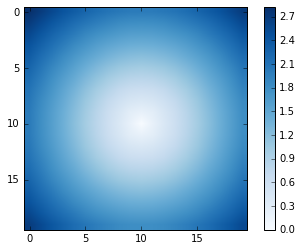

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

z = np.sqrt( xs**2 + ys**2)
plt.imshow(z, cmap=plt.cm.Blues); plt.colorbar()

## Expressing Conditional Logic

In [57]:
xarr = np.array([1.1, 1.2, 1.3])
yarr = np.array([2.1, 2.2, 2.3])
cond = np.array([True, False, True])

In [59]:
result = [(x if c else y) 
             for x,y,c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3]

#### where

In [60]:
# Better and faster to use np.where
# When True, yield x, otherwise yield y.

result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3])

In [64]:
#i.e. replace all positive number with 2 and negative with -2

arr = np.random.randn(4, 4)
arr

array([[ 0.81366883,  1.74640033, -0.7999725 ,  1.70049061],
       [ 0.79013196,  1.45862238,  0.59867441, -1.32287603],
       [ 0.27886446,  0.15284553, -0.09686105,  0.67906191],
       [-0.02549812, -1.4063992 ,  1.58292681,  0.4133061 ]])

In [65]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [ 2,  2,  2, -2],
       [ 2,  2, -2,  2],
       [-2, -2,  2,  2]])

In [66]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        , -0.7999725 ,  2.        ],
       [ 2.        ,  2.        ,  2.        , -1.32287603],
       [ 2.        ,  2.        , -0.09686105,  2.        ],
       [-0.02549812, -1.4063992 ,  2.        ,  2.        ]])

with some cleverness, we can rewrite:
    result = []
    for i in range(n):
        if cond1[i] and cond2[i]:
            result.append(0)
        elif cond1[i]:
            result.append(1)
        elif cond2[i]:
            result.append(2)
        else:
            result.append(3)

to:

    np.where(cond1 & cond2, 0,
            np.where(cond1, 1, 
                np.where(cond2, 2, 3)))

## Mathematical and Statistical Methods

In [12]:
arr = np.random.randn(5, 5)
arr

array([[-0.66938329, -0.09460955,  0.68429733, -1.55316588,  0.57557981],
       [ 0.3939079 , -0.76428942,  0.31884977,  0.08591903, -0.41605294],
       [ 0.61596097,  0.98709557, -0.81181499, -0.83320327, -0.66210309],
       [-0.32706941, -2.19338433, -0.00648633,  1.93043244,  1.01631555],
       [ 1.60540979, -0.8461175 , -0.71620113, -1.45893314,  0.04452177]])

In [13]:
arr.mean()

-0.12378097356639609

In [14]:
arr.sum()

-3.0945243391599022

In [18]:
# using axis argument, computes statistics over the given axis

arr.mean(axis = 1)

array([-0.21145632, -0.07633313, -0.14081296,  0.08396158, -0.27426404])

In [47]:
 arr.sum(axis= 0)

-5.1593718607785846

#### cumsum, cumprod

In [48]:
# produce intermediate results

arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [32]:
arr.cumsum(0) ,arr.cumsum(1)

(array([[ 0,  1,  2],
        [ 3,  5,  7],
        [ 9, 12, 15]]), array([[ 0,  1,  3],
        [ 3,  7, 12],
        [ 6, 13, 21]]))

In [34]:
arr.cumprod(0), arr.cumprod(1)

(array([[ 0,  1,  2],
        [ 0,  4, 10],
        [ 0, 28, 80]]), array([[  0,   0,   0],
        [  3,  12,  60],
        [  6,  42, 336]]))

## Methods for Boolean Arrays

In [37]:
arr = np.random.randn(100)

In [45]:
j=0
for i in arr:
    if i> 0:
        j+=1
j

51

In [44]:
(arr>0).sum()    # number of positive values

51

#### any, all
wheter one or more values in an array is True

In [50]:
bools = np.array([False, False, True, False])

In [51]:
bools.any()

True

In [52]:
bools.all()

False

### Sorting

In [55]:
arr = np.random.randn(8)
arr

array([-1.54619964,  0.51813091,  1.03035116,  1.0247142 , -1.34726526,
        0.48848893, -0.85376593, -1.6967397 ])

In [57]:
arr.sort()
arr

array([-1.6967397 , -1.54619964, -1.34726526, -0.85376593,  0.48848893,
        0.51813091,  1.0247142 ,  1.03035116])

In [58]:
# Multidimensional arrays

In [85]:
arr = np.random.randn(5, 3)
arr

array([[-1.09021923,  0.87892698,  0.99630531],
       [-0.17105776, -2.10651959,  0.05856556],
       [-1.44070552,  1.72413621,  0.63163125],
       [ 0.47490565, -0.51911486,  0.89645334],
       [ 1.0099947 , -1.2598008 ,  0.34537338]])

In [86]:
arr.sort(1)
arr

array([[-1.09021923,  0.87892698,  0.99630531],
       [-2.10651959, -0.17105776,  0.05856556],
       [-1.44070552,  0.63163125,  1.72413621],
       [-0.51911486,  0.47490565,  0.89645334],
       [-1.2598008 ,  0.34537338,  1.0099947 ]])

In [88]:
# A quick and dirty  way to compute quantiles

large_arr = np.random.randn(100)
large_arr.sort()

In [89]:
large_arr[int(0.05 * len(large_arr))]    # 5% quantile

-1.4415947282633843

### Unique and Other Set Logic

In [90]:
names = np.array(['Bob', 'Jose', 'Will', 'Jose', 'Jose', 'Bob', 'Will'])

In [91]:
# returns a sorted unique values in an array

np.unique(names)

array(['Bob', 'Jose', 'Will'], 
      dtype='<U4')

#### np.in1d
tests membership of the values in one array in another

In [92]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [93]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

## Mathematical and Statistical

In [113]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [114]:
y = np.array([[6., 23.], [-1., 7.], [8, 9]])
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

#### dot

In [119]:
x.dot(y)   # or np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

In [120]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [121]:
X = np.random.randn(5, 5)
X

array([[-0.31760041,  0.75150666,  0.05335368, -0.41042687,  0.60143872],
       [ 0.53859348,  0.78940527, -0.13250379,  0.2331626 ,  1.95436421],
       [ 0.61384267,  1.53016253, -0.42130209, -0.94289268, -1.00777454],
       [-0.08169006,  1.7658332 , -1.05999404,  1.56080349, -1.13877765],
       [ 0.48240422, -0.81983466,  0.49322844, -1.80657967, -1.4420134 ]])

#### inv, qr

In [122]:
mat = X.T.dot(X)
mat

array([[ 1.00714288,  0.58602604, -0.02239757, -1.32185996, -0.35963091],
       [ 0.58602604,  7.3196161 , -2.98530266,  2.67005746, -0.37596705],
       [-0.02239757, -2.98530266,  1.56476098, -2.20104891,  0.69356133],
       [-1.32185996,  2.67005746, -2.20104891,  6.81169926,  1.98676525],
       [-0.35963091, -0.37596705,  0.69356133,  1.98676525,  8.57309472]])

In [123]:
inv(mat)

array([[  35.84000388,   50.44021796,  180.19520051,   52.09919192,
         -22.93597129],
       [  50.44021796,   75.99132174,  268.91587493,   76.84570798,
         -34.11532823],
       [ 180.19520051,  268.91587493,  954.4410081 ,  273.31530806,
        -121.20121098],
       [  52.09919192,   76.84570798,  273.31530806,   78.59172672,
         -34.76881065],
       [ -22.93597129,  -34.11532823, -121.20121098,  -34.76881065,
          15.52102467]])

In [124]:
mat.dot(inv(mat))

array([[  1.00000000e+00,   4.00934681e-14,   7.93617197e-14,
         -2.89896169e-15,  -8.99518245e-15],
       [  9.21518770e-14,   1.00000000e+00,  -1.75444049e-13,
         -3.43193370e-14,  -6.57286807e-14],
       [ -4.50971633e-14,  -5.69578482e-14,   1.00000000e+00,
         -3.39847045e-14,   3.36561473e-14],
       [  3.61670676e-14,  -4.31546361e-14,  -2.83637047e-13,
          1.00000000e+00,   7.78526340e-15],
       [ -1.04440949e-14,   1.00814900e-14,  -3.12954592e-13,
         -3.06889066e-14,   1.00000000e+00]])

In [125]:
q, r = qr(mat) 

In [126]:
q

array([[-0.55996357, -0.01233544,  0.28940066, -0.75698797, -0.17177048],
       [-0.3258259 , -0.84513505, -0.26327377,  0.21211764, -0.25549414],
       [ 0.01245287,  0.35716924, -0.18390104,  0.1206288 , -0.90769166],
       [ 0.73494381, -0.39677231,  0.33469865, -0.35014875, -0.26038815],
       [ 0.19995198,  0.02442226, -0.83731201, -0.49479275,  0.11623898]])

In [127]:
r

array([[ -1.79858641e+00,  -8.63082513e-01,  -4.74251786e-01,
          5.24628402e+00,   3.50688493e+00],
       [  0.00000000e+00,  -8.32813814e+00,   3.97239830e+00,
         -5.68057274e+00,  -9.02114002e-03],
       [  0.00000000e+00,   0.00000000e+00,  -8.25706484e-01,
         -6.44039033e-02,  -6.64602931e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -2.06665654e+00,  -4.66141793e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   7.48913032e-03]])

In [128]:
np.diag(mat), np.trace(mat)

(array([ 1.00714288,  7.3196161 ,  1.56476098,  6.81169926,  8.57309472]),
 25.27631392519438)

#### eigenvalues and eigenvectors

In [129]:
np.linalg.eig(mat)

(array([  1.14205764e+01,   9.17589356e+00,   4.17195672e+00,
          5.07023628e-01,   8.63575344e-04]),
 array([[ 0.0582744 , -0.08411251,  0.337173  ,  0.91997772,  0.17171065],
        [-0.61538084, -0.42604685,  0.55754502, -0.25204778,  0.2557459 ],
        [ 0.31069048,  0.22024678,  0.0157863 , -0.17477355,  0.90783687],
        [-0.65375361,  0.09083659, -0.66135384,  0.24355868,  0.26008693],
        [-0.30657489,  0.8687055 ,  0.3712409 , -0.01569376, -0.11531044]]))

## Random Numbers

In [130]:
samples = np.random.normal(size = (4, 4))
samples

array([[-0.63306796, -0.72291953,  0.92414342,  0.9316455 ],
       [ 0.59905317, -0.61328198, -0.51687885,  0.8489527 ],
       [ 0.11572792, -0.22977218, -0.71468807,  0.42544747],
       [ 0.47449101, -1.10110875,  0.87322961,  0.26884628]])

In [131]:
#Comparing with Python's built-in random module

from random import normalvariate
N = 100000

In [137]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

10 loops, best of 3: 107 ms per loop


In [138]:
%timeit np.random.normal(size= N)

100 loops, best of 3: 3.97 ms per loop


In [139]:
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x - mu)**2/ 2/ sigma**2)/ (sqrt_two_pi*sigma))

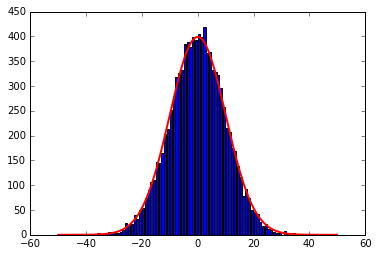

In [140]:
norm = np.random.normal(size= 10000)
histogram = Counter(norm*10000//1000)
plt.bar([x for x in histogram.keys()], histogram.values())

xs = [x/10.0 for x in np.arange(-500, 500)]
plt.plot(xs, [10000*normal_pdf(x, sigma=10) for x in xs], 'r-', lw='2')

## Random walks

In [141]:
nsteps = 1000
draws = np.random.randint(0, 2, size= nsteps)
steps = np.where(draws > 0, 1, -1)
walk  = steps.cumsum()

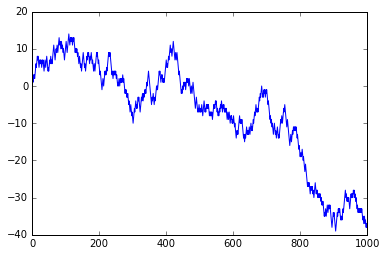

In [142]:
plt.plot([i for i in np.arange(nsteps)], walk)

In [143]:
walk.min(), walk.max()

(-39, 14)

In [144]:
# when it first crosses 10
(np.abs(walk) >= 20).argmax()

809

### Many random walks

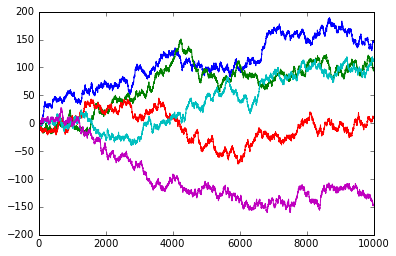

In [145]:
nwalks = 5
nsteps = 10000
draws  = np.random.randint(0, 2, size=(nwalks, nsteps))
steps  = np.where(draws > 0, 1, -1)
walks  = steps.cumsum(1)

for i in range(nwalks):
    plt.plot([j for j in np.arange(nsteps)], walks[i]) 

In [146]:
walks.min(), walks.max()

(-160, 189)

In [147]:
hits100 = (np.abs(walks) >= 100).any(1)
hits100

array([ True,  True, False,  True,  True], dtype=bool)

In [148]:
hits100.sum()    # random walks that hit 100

4

In [149]:
crossing_time = (np.abs(walks[hits100]) >= 100).argmax(1)
crossing_time

array([2899, 3797, 7151, 3233])